### Language Detection

As a human, you can easily detect the languages you know. For example, I can easily identify Hindi and English, but being an Indian, it is also not possible for me to identify all Indian languages. This is where the language identification task can be used. Google Translate is one of the most popular language translators in the world which is used by so many people around the world. It also includes a machine learning model to detect languages that you can use if you don’t know which language you want to translate.

# 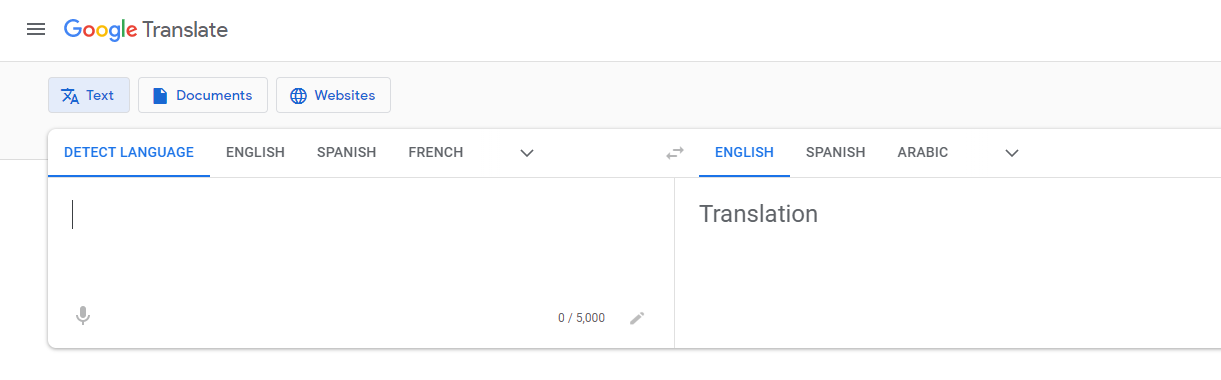

In [19]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [20]:
data=pd.read_csv("\Language.csv")#Enter the path of the dataset
data

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [21]:
data.shape

(22000, 2)

In [4]:
data.dtypes

Text        object
language    object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [22]:
data.isnull().sum()

Text        0
language    0
dtype: int64

In [23]:
data["language"].value_counts()

Hindi         1000
Spanish       1000
Korean        1000
Tamil         1000
Indonesian    1000
Swedish       1000
Latin         1000
Russian       1000
Dutch         1000
Persian       1000
Turkish       1000
Estonian      1000
Urdu          1000
Portugese     1000
Pushto        1000
French        1000
Japanese      1000
Chinese       1000
Thai          1000
Arabic        1000
Romanian      1000
English       1000
Name: language, dtype: int64

This dataset contains 22 languages with 1000 sentences from each language. This is a very balanced dataset with no missing values, so we can say this dataset is completely ready to be used to train a machine learning model.

In [6]:
x = np.array(data["Text"])
y = np.array(data["language"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

As this is a problem of multiclass classification, so I will be using the Multinomial Naïve Bayes algorithm to train the language detection model as this algorithm always performs very well on the problems based on multiclass classification:

In [7]:
model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.953168044077135

In [8]:
from sklearn.metrics import accuracy_score
preds = model.predict(X_test)
accuracy_score(y_test, preds)

0.953168044077135

In [9]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: தமிழ் செய்திகள்
['Tamil']


In [27]:
user_inp = input("Enter a Text: ")
data = cv.transform([user_inp]).toarray()
output = model.predict(data)
print(output)

Enter a Text: Como vai você
['Portugese']


In [28]:
user_inp = input("Enter a Text: ")
data = cv.transform([user_inp]).toarray()
output = model.predict(data)
print(output)

Enter a Text: คุณเป็นอย่างไร
['Thai']


In [30]:
user_inp = input("Enter a Text: ")
data = cv.transform([user_inp]).toarray()
output = model.predict(data)
print(output)

Enter a Text:  आप कहां के रहने वाले हैं
['Hindi']
